# Lab 2
Ali Tejani, amt3639;
Caroline Yao, chy253

## Programming Questions

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Correlations

#### Pandas

In [63]:
path = 'Data\DF1'
df=pd.read_csv(path,index_col=0,na_values='?')
df.head()

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000024111710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000024A28978>]], dtype=object)

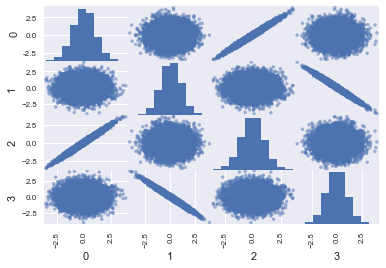

In [64]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

#### Seaborn

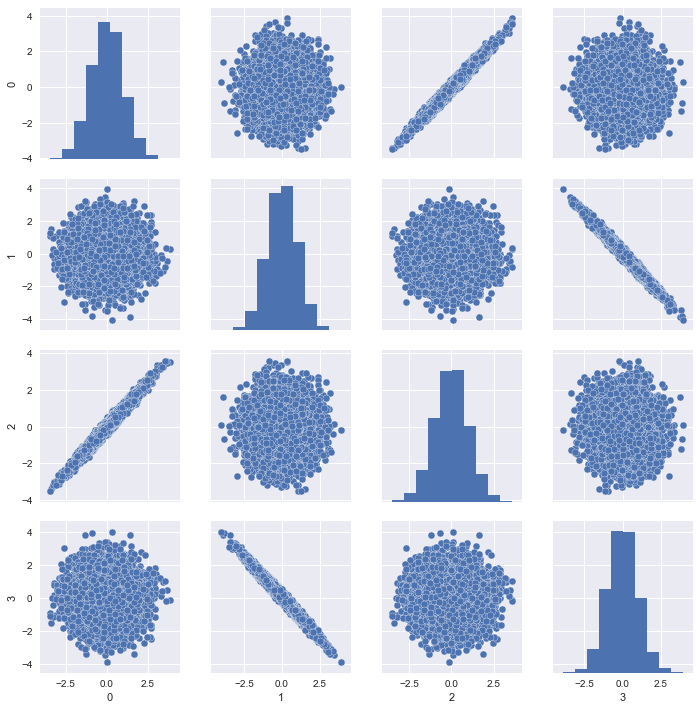

In [71]:
sns.pairplot(df)

#### Covariance Matrix

In [79]:
df.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


The covariance matrix is an n x n matrix where each element is cov($x_{i}$,$x_{j}$)

For example:
\begin{align}
\sigma^2 = \begin{pmatrix}
\sigma_1^2 & \sigma_{12}^2 \\
\sigma_{12}^2 & \sigma_2^2 
\end{pmatrix}.
\end{align}

Columns 0 and 1 have a low covariance magnitude, so their plot seems to have no relation. This is the case for 0 and 3, 1 and 2, and 2 and 3 as well.
Columns 0 and 2 have a high covariance, so their plot looks like a line with a positive slope.
Columns 1 and 3 have a high negative covariance, so their plot looks like a line with a negative slope.

#### Covariance vs Sample Size

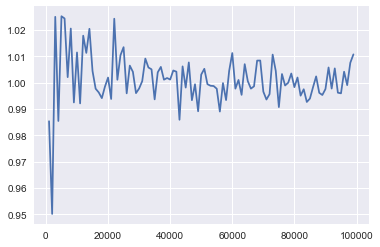

In [192]:
a = {}
for i in range(1000,100000,1000):
    samples1 = np.random.multivariate_normal((0,0,0),((1,0,0),(0,1,1),(0,1,1)), i)
    a[i] = np.cov(samples1,rowvar=False)[1,2]
plt.plot(*zip(*sorted(a.items())))
plt.show()


As the number of samples increases, the calculated covariance approaces the true variance.

### 2. Outliers

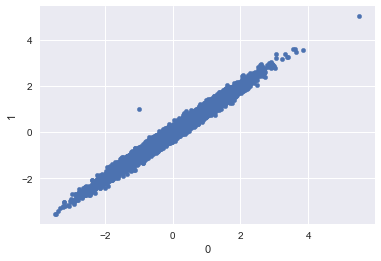

In [210]:
plt.clf()
path = 'Data\DF2'
df=pd.read_csv(path,index_col=0,na_values='?')
df.plot(x='0',y='1',kind='scatter')

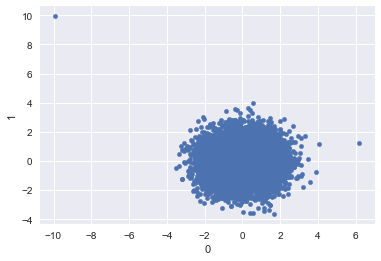

In [248]:
cov = df.cov()

from scipy.linalg import sqrtm
cov_inv = np.linalg.inv(sqrtm(cov))
data = pd.DataFrame(np.dot(df,cov_inv))

data.plot(x = 0, y = 1,kind='scatter')

\begin{array}{rcl}
\mathbf{C_y} & \triangleq & E\{(\mathbf{y}-\mathbf{\bar{y}})(\mathbf{y}-\mathbf{\bar{y}})^T\} \\
& = & E \Big\{ \Big[ (\mathbf{A}\mathbf{x}+\mathbf{b})-(\mathbf{A}\mathbf{\bar{x}}+\mathbf{b}) \Big] \Big[ (\mathbf{A}\mathbf{x}+\mathbf{b})-(\mathbf{A}\mathbf{\bar{x}}+\mathbf{b}) \Big] ^T \Big\} \\
& = & E \Big\{ \Big[ \mathbf{A}(\mathbf{x}-\mathbf{\bar{x}}) \Big] \Big[ \mathbf{A}(\mathbf{x}-\mathbf{\bar{x}}) \Big] ^T \Big\} \\
& = & E \Big\{ \mathbf{A}(\mathbf{x}-\mathbf{\bar{x}}) (\mathbf{x}-\mathbf{\bar{x}})^T \mathbf{A}^T \Big\} \\
& = & \mathbf{A} E \Big\{ (\mathbf{x}-\mathbf{\bar{x}}) (\mathbf{x}-\mathbf{\bar{x}})^T  \Big\} \mathbf{A}^T \\
& = & \mathbf{A}\mathbf{C_x}\mathbf{A}^T
\end{array}